# Mean-variance optimization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

## Downloading data

In [2]:
# ALL FILES
path = r'C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f, index_col=False) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

In [54]:
all_files

['C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\Allianz Technology Trust Ord daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\Fundsmith Equity I Inc daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\GS India Equity R Inc GBP daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\HgCapital Trust Ord daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\iShares Physical Gold ETC GBP.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\iShares Physical Silver ETC GBP.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\iShares £ Corp Bond 0-5yr ETF GBP Dist.csv',
 'C:\\Users\\Ferhat\\

In [2]:
# SOME FILES
path = r'C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
#sub_files = all_files[1, 3, 4, 7, 8, 13, 14]

indices = [1, 7, 14]
sub_files = []

for index in indices:
    sub_files.append(all_files[index])

df_from_each_file = (pd.read_csv(f, index_col=False) for f in sub_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
sub_files

['C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\Fundsmith Equity I Inc daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\JPM Global Macro Opportunities C Net Inc daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\Scottish Mortgage Ord daily.csv']

In [3]:
concatenated_df.drop([ 'High', 'Low', 'Open', 'Volume'], axis=1, inplace=True)

In [4]:
concatenated_df['Close'] = concatenated_df['Close'].fillna(concatenated_df['NAV'])

In [5]:
concatenated_df.drop(['NAV'], axis=1, inplace=True)

In [6]:
concatenated_df

,Date,Name,Close
0,11/01/2010,Fundsmith Equity I Inc,1.0000
1,11/02/2010,Fundsmith Equity I Inc,0.9992
2,11/03/2010,Fundsmith Equity I Inc,1.0003
3,11/04/2010,Fundsmith Equity I Inc,1.0049
4,11/05/2010,Fundsmith Equity I Inc,1.0086
...,...,...,...
26738,01/17/2022,Scottish Mortgage Ord,11.4950
26739,01/18/2022,Scottish Mortgage Ord,11.1850
26740,01/19/2022,Scottish Mortgage Ord,11.1800
26741,01/20/2022,Scottish Mortgage Ord,11.5400


In [7]:
concatenated_df['Name'].unique()

array(['Fundsmith Equity I Inc',
       'JPM Global Macro Opportunities C Net Inc',
       'Scottish Mortgage Ord'], dtype=object)

In [8]:
concatenated_df_pivot = concatenated_df.pivot(columns='Name', values='Close', index='Date')


In [9]:
concatenated_df_pivot

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
01/01/1969,NaN,NaN,0.04852
01/01/1970,NaN,NaN,0.03852
01/01/1971,NaN,NaN,0.03852
01/01/1972,NaN,NaN,0.05000
01/01/1973,NaN,NaN,0.05000
...,...,...,...
12/31/2017,3.3626,1.463,4.49000
12/31/2018,3.4182,1.430,4.66950
12/31/2019,4.2682,1.449,5.79000


In [10]:
concatenated_df_pivot = concatenated_df_pivot.sort_values(by="Date", key=pd.to_datetime)

In [11]:
concatenated_df_pivot

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
12/31/1968,NaN,NaN,0.04852
01/01/1969,NaN,NaN,0.04852
01/02/1969,NaN,NaN,0.04852
01/03/1969,NaN,NaN,0.04852
01/04/1969,NaN,NaN,0.04852
...,...,...,...
01/17/2022,5.6414,1.684,11.49500
01/18/2022,5.6396,1.683,11.18500
01/19/2022,5.5615,1.673,11.18000


In [12]:
concatenated_df_pivot = concatenated_df_pivot.dropna()
concatenated_df_pivot

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
02/15/2013,1.4101,1.000,1.657
02/16/2013,1.4101,1.000,1.657
02/17/2013,1.4101,1.000,1.657
02/18/2013,1.4154,1.005,1.649
02/19/2013,1.4159,1.006,1.672
...,...,...,...
01/17/2022,5.6414,1.684,11.495
01/18/2022,5.6396,1.683,11.185
01/19/2022,5.5615,1.673,11.180


<AxesSubplot:xlabel='Date'>

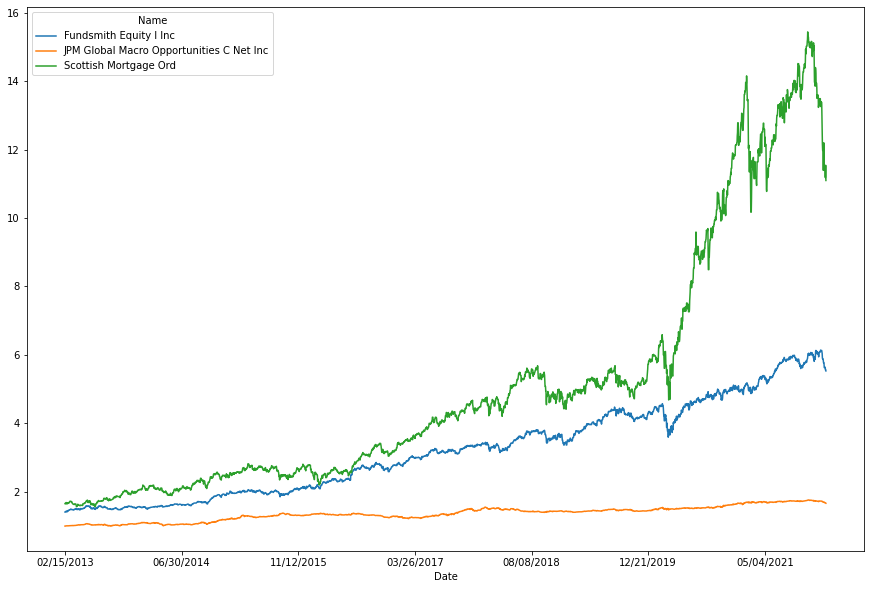

In [13]:
concatenated_df_pivot.plot(figsize=(15,10))

## Calculating the covariance matrix

In [14]:
import pypfopt
pypfopt.__version__

'1.5.1'

In [15]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(concatenated_df_pivot, frequency=252)
sample_cov

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Name,,,
Fundsmith Equity I Inc,0.013283,0.002410,0.007838
JPM Global Macro Opportunities C Net Inc,0.002410,0.003225,0.001416
Scottish Mortgage Ord,0.007838,0.001416,0.043757


<AxesSubplot:>

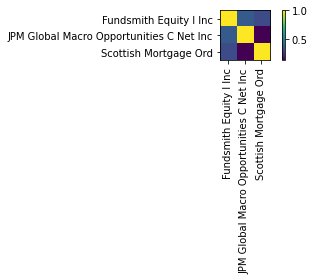

In [16]:
plotting.plot_covariance(sample_cov, plot_correlation=True)

## Return estimation

In [17]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(concatenated_df_pivot)
mu

Name
Fundsmith Equity I Inc                      0.094467
JPM Global Macro Opportunities C Net Inc    0.042315
Scottish Mortgage Ord                       0.187754
Name: mkt, dtype: float64

<AxesSubplot:ylabel='Name'>

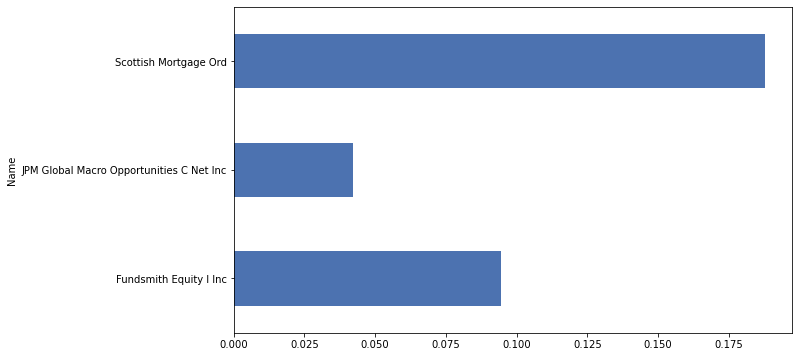

In [18]:
mu.plot.barh(figsize=(10,6))

## Long/short min variance

In [19]:
from pypfopt import EfficientFrontier

In [20]:
S = risk_models.CovarianceShrinkage(concatenated_df_pivot).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(0, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.06362),
             ('JPM Global Macro Opportunities C Net Inc', 0.90161),
             ('Scottish Mortgage Ord', 0.03478)])

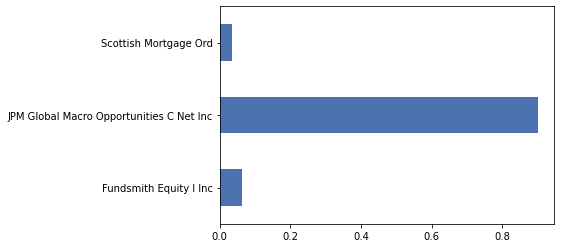

In [21]:
pd.Series(weights).plot.barh();

In [22]:
ef.portfolio_performance(verbose=True);

Annual volatility: 5.7%


In [23]:
returns = np.log(concatenated_df_pivot/concatenated_df_pivot.shift(1))

In [24]:
agg_returns = returns * weights

In [25]:
portfolio_return = agg_returns.sum(axis=1)
portfolio_return.name = 'Close'
portfolio_return.index = pd.to_datetime(portfolio_return.index)

In [26]:
import quantstats as qs
qs.extend_pandas()

In [27]:
qs.reports.html(portfolio_return, "SPY", output = 'min_variance.html')

## Max Sharpe

In [28]:
S = risk_models.CovarianceShrinkage(concatenated_df_pivot).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.33931),
             ('JPM Global Macro Opportunities C Net Inc', 0.32073),
             ('Scottish Mortgage Ord', 0.33995)])

In [29]:
ef.portfolio_performance(verbose=True);

Expected annual return: 10.9%
Annual volatility: 9.8%
Sharpe Ratio: 0.92


In [30]:
returns = np.log(concatenated_df_pivot/concatenated_df_pivot.shift(1))
agg_returns = returns * weights
portfolio_return = agg_returns.sum(axis=1)
portfolio_return.name = 'Close'
portfolio_return.index = pd.to_datetime(portfolio_return.index)
qs.reports.html(portfolio_return, "SPY", output = 'max_sharpe.html')

## Maximise return for a given risk, with L2 regularisation

In [31]:
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.12)
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.43132),
             ('JPM Global Macro Opportunities C Net Inc', 0.12689),
             ('Scottish Mortgage Ord', 0.44178)])

In [32]:
ef.portfolio_performance(verbose=True)

Expected annual return: 12.9%
Annual volatility: 12.0%
Sharpe Ratio: 0.91


(0.12906214742330374, 0.11999999986210648, 0.9088512295719036)

In [33]:
returns = np.log(concatenated_df_pivot/concatenated_df_pivot.shift(1))
agg_returns = returns * weights
portfolio_return = agg_returns.sum(axis=1)
portfolio_return.name = 'Close'
portfolio_return.index = pd.to_datetime(portfolio_return.index)
qs.reports.html(portfolio_return, "SPY", output = 'max-return_given_risk.html')

## L2 Regularisation

In [34]:
from pypfopt import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.28838),
             ('JPM Global Macro Opportunities C Net Inc', 0.06341),
             ('Scottish Mortgage Ord', 0.64822)])

In [35]:
ef.portfolio_performance(verbose=True)

Expected annual return: 15.2%
Annual volatility: 15.0%
Sharpe Ratio: 0.88


(0.15163078921789364, 0.1499999991769511, 0.8775385996010056)

In [36]:
returns = np.log(concatenated_df_pivot/concatenated_df_pivot.shift(1))
agg_returns = returns * weights
portfolio_return = agg_returns.sum(axis=1)
portfolio_return.name = 'Close'
portfolio_return.index = pd.to_datetime(portfolio_return.index)
qs.reports.html(portfolio_return, "SPY", output = 'max-return-L2_regularised.html')

## Efficient semi-variance optimization

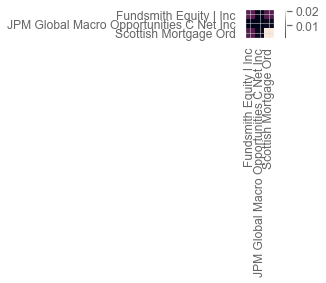

In [37]:
semicov = risk_models.semicovariance(concatenated_df_pivot, benchmark=0)
plotting.plot_covariance(semicov);

In [38]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.06)
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.11219),
             ('JPM Global Macro Opportunities C Net Inc', 0.80644),
             ('Scottish Mortgage Ord', 0.08137)])

In [40]:
ef.portfolio_performance(verbose=True);

Expected annual return: 6.0%
Annual volatility: 4.4%
Sharpe Ratio: 0.92


In [39]:
returns = np.log(concatenated_df_pivot/concatenated_df_pivot.shift(1))
agg_returns = returns * weights
portfolio_return = agg_returns.sum(axis=1)
portfolio_return.name = 'Close'
portfolio_return.index = pd.to_datetime(portfolio_return.index)
qs.reports.html(portfolio_return, "SPY", output = 'semi-variance_opt.html')

## Efficient CVaR optimization

In [41]:
returns = expected_returns.returns_from_prices(concatenated_df_pivot).dropna()
returns.head()

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
02/16/2013,0.000000,0.000000,0.000000
02/17/2013,0.000000,0.000000,0.000000
02/18/2013,0.003759,0.005000,-0.004828
02/19/2013,0.000353,0.000995,0.013948
02/20/2013,0.014832,0.000000,0.009569


In [42]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 10.9%
Annual volatility: 9.8%
Sharpe Ratio: 0.92


## Plotting - Unconstrained

In [172]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 8.6%
Annual volatility: 7.5%
Sharpe Ratio: 0.89


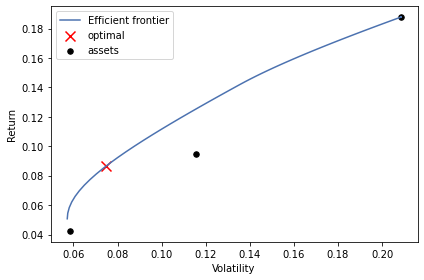

In [173]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)